## Sentiment Analysis - News Channels (CNN, Fox)

In [1]:
# Import relevant libraries

import json
import tweepy
import csv
import re
import pandas as pd
import numpy as np
from textblob import TextBlob
from wordcloud import WordCloud

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
cd /Users/abhishekshirsat/Desktop

/Users/abhishekshirsat/Desktop


In [5]:
#Load the API keys from csv and save in variables

log = pd.read_csv('Twitter_API_keys.csv')

In [6]:
mykey = log['Key'][0]
mysecret = log['Key'][1]
access_token = log['Key'][2]
access_token_Secret = log['Key'][3]

In [7]:
# Create authentication object
authenticate = tweepy.OAuthHandler(mykey, mysecret)

# Create access object
authenticate.set_access_token(access_token, access_token_Secret)

# Create API object
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [8]:
# Extract tweets using username

tweet_post_CNN = api.user_timeline(screen_name = 'CNN', count = 250, lang = 'en', tweet_mode = 'extended')

In [9]:
tweet_post_Fox = api.user_timeline(screen_name = 'FoxNews', count = 250, lang = 'en', tweet_mode = 'extended')

In [10]:
# for tweet in tweet_post_CNN[0:5]:
#     print(tweet.full_text + '\n')

In [11]:
# for tweet in tweet_post_Fox[0:5]:
#     print(tweet.full_text + '\n')

In [12]:
df_tweets_CNN = pd.DataFrame([tweet.full_text for tweet in tweet_post_CNN], columns = ['Tweets'])

In [13]:
df_tweets_Fox = pd.DataFrame([tweet.full_text for tweet in tweet_post_Fox], columns = ['Tweets'])

In [14]:
# df_tweets_Fox.head(5)

In [15]:
df_tweets_Fox1 = df_tweets_Fox.copy()  #checkpoint

In [16]:
df_tweets_CNN1 = df_tweets_CNN.copy()  #checkpoint

In [17]:
# Function to clean the text   
#https://towardsdatascience.com/another-twitter-sentiment-analysis-bb5b01ebad90

import re
def cleanText(text):
    text = re.sub(r'@[A-Za-z0-9]+','', text) #removes @mentions
    text = re.sub("[^a-zA-Z]", " ", text) #removes #
    text = re.sub(r'RT[\s+]', '', text)  #removes RT
    text = re.sub('https?://[A-Za-z0-9./]+','', text) # removes url
    
    return text

In [18]:
df_tweets_Fox1['Tweets'] = df_tweets_Fox1['Tweets'].apply(cleanText)

In [19]:
df_tweets_CNN1['Tweets'] = df_tweets_CNN1['Tweets'].apply(cleanText)

In [20]:
# df_tweets_Fox1.head(5)

In [21]:
df_tweets_Fox_clean = df_tweets_Fox1.copy()

In [22]:
df_tweets_CNN_clean = df_tweets_CNN1.copy()

In [23]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [24]:
df_tweets_Fox_clean['Subjectivity'] = df_tweets_Fox_clean['Tweets'].apply(getSubjectivity)
df_tweets_Fox_clean['Polarity'] = df_tweets_Fox_clean['Tweets'].apply(getPolarity)

In [25]:
df_tweets_CNN_clean['Subjectivity'] = df_tweets_CNN_clean['Tweets'].apply(getSubjectivity)
df_tweets_CNN_clean['Polarity'] = df_tweets_CNN_clean['Tweets'].apply(getPolarity)

In [26]:
# df_tweets_Fox_clean.head(10)

In [27]:
#Label Positive, negative, neutral based on polarity

def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [28]:
df_tweets_Fox_clean['Analysis'] = df_tweets_Fox_clean['Polarity'].apply(getAnalysis)

In [29]:
df_tweets_CNN_clean['Analysis'] = df_tweets_CNN_clean['Polarity'].apply(getAnalysis)

In [30]:
df_tweets_Fox_clean.head()

,Tweets,Subjectivity,Polarity,Analysis
0,Interesting moments from Amy Coney Barrett s...,0.500000,0.500000,Positive
1,BIG TECH BACKLASHPublished mins ago Twitter...,0.100000,-0.050000,Negative
2,Sen John Kennedy New Hunter Biden report as ...,0.560606,-0.098485,Negative
3,Trump administration secures release of two Am...,0.000000,0.000000,Neutral
4,Amy Coney Barrett tells Democratic senator I...,1.000000,0.600000,Positive


In [31]:
#Positive tweets

j = 1
sorteddf = df_tweets_Fox_clean.sort_values(by = ['Polarity'])
for i in range(0, sorteddf.shape[0]):
    if(sorteddf['Analysis'][i] == 'Positive'):
        print(str(j) + ') ' + sorteddf['Tweets'][i])
        print()
        j= j + 1

1)   Interesting moments from Amy Coney Barrett s day three hearings https   t co b cxsOWX Q

2) Amy Coney Barrett tells Democratic senator   I hope you aren t suggesting I don t have my own mind  https   t co cexH oV DI

3) New polls in key battlegrounds raise concerns for Trump https   t co zfqfjZREjN

4)   JUST IN  Facebook reducing distribution of Hunter Biden story in New York Post https   t co   IpNKi WT

5) Trump campaign blasts Biden over new Hunter Biden Ukraine story  claims it shows he  lied   https   t co  yvK SRVtN

6)   All three major averages move higher on strength of Big Tech  energy https   t co kNtbG lSpw

7) Former Idaho gubernatorial candidate indicted in      killing of    year old girl  https   t co KeC NzYD N

8) EXCLUSIVE  Kamala Harris dodges questions on court packing  claims Biden  has been very clear   https   t co BL OozaUHP

9) Ex Facebook honcho Tim Kendall says Big Tech is a  threat to democracy   calls for social media reform  https   t co BpZeIYq A 


In [32]:
j = 1
sorteddfCNN = df_tweets_CNN_clean.sort_values(by = ['Polarity'])
for i in range(0, sorteddfCNN.shape[0]):
    if(sorteddfCNN['Analysis'][i] == 'Positive'):
        print(str(j) + ') ' + sorteddfCNN['Tweets'][i])
        print()
        j= j + 1

1)   asks  How can President Trump keep holding potential superspreader events that will sicken folks and maybe their kids too    He is parading around like Superman  saying he understands Covid better now   but he is only doing things that will make it worse for others   https   t co IKK hxptEW

2)   With just    days to go until the election  Joe Biden leads comfortably  John King tells     Can the President wi 

3) Dr  Anthony Fauci said he is pleased President Trump is doing well after contracting Covid     but warned that not everyone who gets the virus will have the same experience https   t co eN enEhLx 

4) Apathy  a decrease in motivation and goal directed behavior  in older adults could lead to an increased risk of developing dementia  according to a new study https   t co m YnFSrbPp

5) United Airlines has posted its third huge quarterly loss of the year  The carrier posted a      billion loss excluding special items  slightly less the      billion it lost on that basis in t

In [33]:
# Negative Tweets

j = 1
sorteddf = df_tweets_Fox_clean.sort_values(by = ['Polarity'], ascending = 'False')
for i in range(0, sorteddf.shape[0]):
    if(sorteddf['Analysis'][i] == 'Negative'):
        print(str(j) + ') ' + sorteddf['Tweets'][i])
        print()
        j= j + 1

1) BIG TECH BACKLASHPublished    mins ago Twitter s Jack Dorsey says company botched blocking NYP article on alleged emails on Hunter Biden s laptop https   t co SlS jXyCCB

2) Sen  John Kennedy  New Hunter Biden report as serious as  four heart attacks and a stroke  https   t co  Hto XEbic

3) Barrett admits she had glass of wine after long confirmation hearing day   I needed that  https   t co oSFuSq u  

4) Hunter Biden emails under investigation by Senate Homeland Security Committee after hard drive report emerges  https   t co IeEsZPzlJ 

5) Bojangles fires employees who allegedly pretended to spit in officer s order  https   t co WyViT  shl

6) Barrett  pressed by Democrats on future of ObamaCare in hearing  makes  Jenga game  comparison  https   t co L  rf lyYR https   t co uvhxffoJRl

7) Biden says Pennsylvania plant  thinking of shutting down   company responds to  untrue  claim  report  https   t co  OsNmg Ns 

8) WATCH NOW  Supreme Court nominee on Capitol Hill  set to face 

In [34]:
j = 1
sorteddfCNN1 = df_tweets_CNN_clean.sort_values(by = ['Polarity'], ascending = 'False')
for i in range(0, sorteddfCNN1.shape[0]):
    if(sorteddfCNN1['Analysis'][i] == 'Negative'):
        print(str(j) + ') ' + sorteddfCNN1['Tweets'][i])
        print()
        j= j + 1

1)  Being weak     as my grandfather understood it  was unacceptable   says Mary Trump    Donald doesn t want to be associated with Covid at all  even if it s someone else having it    If he had been asymptomatic  we probably never would have known that he had tested positive   https   t co aJsf  qfS 

2) Only half of registered voters in the United States say they expect to know the results of the upcoming presidential election within a  day or two  of Election Day  a new study by the Pew Research Center says https   t co hH deJzwDQ

3) This is  all part of the reckless approach that the White House has taken with coronavirus   CNN s  discusses Pres  Trump holding rallies with thousands of supporters packed together with few masks despite the coronavirus pandemic  https   t co lR U p  Up https   t co iDGoDLBrHQ

4) A disturbing number of courts are refusing to protect the right to vote because they are unduly deferential to state legislatures and election officials   writes for  https

In [35]:
df_tweets_CNN_clean.head()

,Tweets,Subjectivity,Polarity,Analysis
0,Being weak as my grandfather understood i...,0.585227,-0.073864,Negative
1,Only half of registered voters in the United S...,0.430303,-0.032576,Negative
2,asks How can President Trump keep holding p...,0.775000,0.025000,Positive
3,With just days to go until the election ...,0.800000,0.400000,Positive
4,This is all part of the reckless approach tha...,0.050000,-0.100000,Negative


In [36]:
df_CNN = df_tweets_CNN_clean[['Polarity', 'Subjectivity']]
# df_CNN.head()

In [37]:
df_Fox = df_tweets_Fox_clean[['Polarity', 'Subjectivity']]
# df_Fox.head()

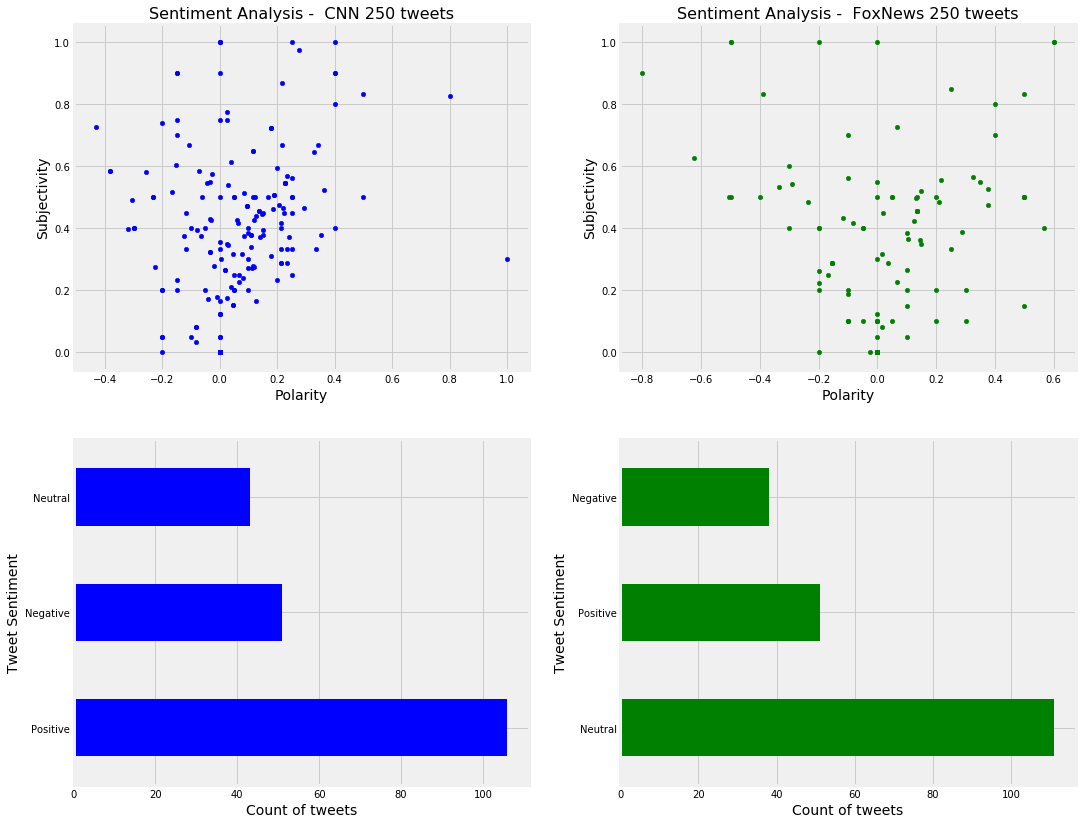

In [39]:
fig = plt.figure(figsize = (16, 14)) # create figure

ax0 = fig.add_subplot(2, 2, 1) 
ax1 = fig.add_subplot(2, 2, 2) 
ax2 = fig.add_subplot(2, 2, 3) 
ax3 = fig.add_subplot(2, 2, 4) 

df_CNN.plot(kind='scatter', x='Polarity', y='Subjectivity', color = 'blue', ax=ax0)
ax0.set_title('Sentiment Analysis -  CNN 250 tweets', fontsize = 16)
ax0.set_xlabel('Polarity', fontsize = 14)
ax0.set_ylabel('Subjectivity', fontsize = 14)

df_Fox.plot(kind='scatter', x='Polarity', y='Subjectivity', color = 'green', ax=ax1)
ax1.set_title('Sentiment Analysis -  FoxNews 250 tweets', fontsize = 16 )
ax1.set_xlabel('Polarity', fontsize = 14)
ax1.set_ylabel('Subjectivity', fontsize = 14)

df_tweets_CNN_clean['Analysis'].value_counts().plot(kind = 'barh', color = 'blue', ax = ax2)
df_tweets_Fox_clean['Analysis'].value_counts().plot(kind = 'barh', color = 'green', ax = ax3)

# ax2.set_title('Sentiment Analysis -  CNN 250 tweets', fontsize = 16)
ax2.set_xlabel('Count of tweets', fontsize = 14)
ax2.set_ylabel('Tweet Sentiment', fontsize = 14)

# ax3.set_title('Sentiment Analysis -  Fox 250 tweets', fontsize = 16)
ax3.set_xlabel('Count of tweets', fontsize = 14)
ax3.set_ylabel('Tweet Sentiment', fontsize = 14)

plt.show()

In [40]:
plt.savefig('Sentiment1.png')

<Figure size 432x288 with 0 Axes>

In [41]:
fig.savefig('Sentiment2.png')

In [ ]:
# % positive tweets
posTweets = df_tweets_CNN_clean[df_tweets_CNN_clean.Analysis == 'Positive']
posTweets = posTweets['Tweets']

round((posTweets.shape[0]/df_tweets_CNN_clean.shape[0])*100, 1)

In [ ]:
negTweets = df_tweets_CNN_clean[df_tweets_CNN_clean.Analysis == 'Negative']
negTweets = negTweets['Tweets']

round((negTweets.shape[0]/df_tweets_CNN_clean.shape[0])*100, 1)

In [ ]:
# % positive tweets
posTweets = df_tweets_Fox_clean[df_tweets_Fox_clean.Analysis == 'Positive']
posTweets = posTweets['Tweets']

round((posTweets.shape[0]/df_tweets_Fox_clean.shape[0])*100, 1)

In [ ]:
negTweets = df_tweets_Fox_clean[df_tweets_Fox_clean.Analysis == 'Negative']
negTweets = negTweets['Tweets']

round((negTweets.shape[0]/df_tweets_Fox_clean.shape[0])*100, 1)